In [1]:
import numpy as np
import and_logic_generator as and_gen
import and_gate_pipeline as pipeline
import matplotlib.pyplot as plt

# reload modules every 2 seconds
%load_ext autoreload
%autoreload 2

In [2]:
# Repeatable seed
random_state = 2**12
np.random.seed(seed=random_state)


In [3]:
# Prepare samples
n = 2000
scale = 0.06  # Control how spread the blob is.
# Creating 4 blobs
centres = [
    [0.25, 0.25],
    [0.75, 0.25],
    [0.25, 0.75],
    [0.75, 0.75]]

x = np.array([], dtype=np.float32)
y = np.array([], dtype=np.int)
for centre in centres:
    temp_x, temp_y = and_gen.generate_logistic_samples(
        n=int(n / len(centres)), threshold=0.5, centre=centre, scale=scale, logic='xor')
    # numpy append func does NOT allow preallocate multi-dimensional array
    if len(x) == 0:
        x = temp_x
    else:
        x = np.append(x, temp_x, axis=0)
    y = np.append(y, temp_y)
x = x - 0.5
shift = [[-0.5, -0.5]]


In [4]:
and_gate_pipeline = pipeline.LogicGatePipeline(x, y, logic='xor')
and_gate_pipeline.random_state = random_state


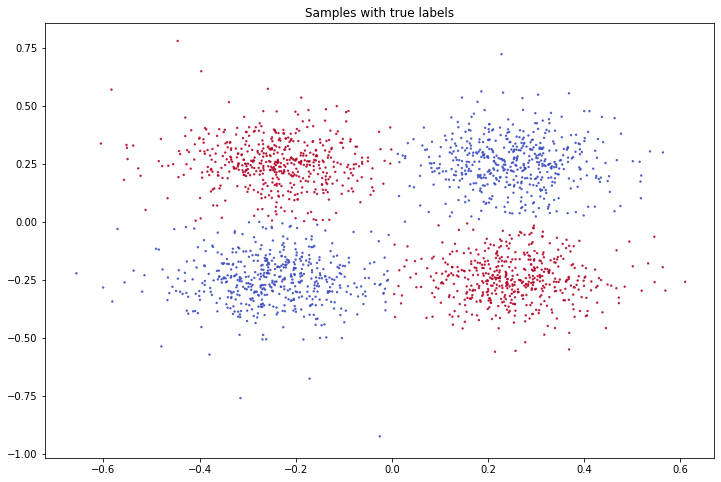

In [5]:
# Parameters for figures
figsize = np.array(plt.rcParams["figure.figsize"]) * 2
x_max = np.amax(x, axis=0) * 1.1
x_min = np.amin(x, axis=0) * 1.1

and_gate_pipeline.plot_data(
    figsize=figsize, xlim=[x_min[0], x_max[0]], ylim=[x_min[1], x_max[1]])


In [6]:
# 80:20 split on training and test sets
and_gate_pipeline.train_test_split(0.2)

Train test split: 0.80:0.20


In [7]:
# Parameters for SVM
gamma='scale'
C=100
shift=[[-0.5, -0.5]]

and_gate_pipeline.fit_svm_model(gamma=gamma, C=C, shift=shift)


With gamma = scale and C = 100
Accuracy on train set = 99.8750%
Accuracy on test set  = 99.5000%
Passed basic test


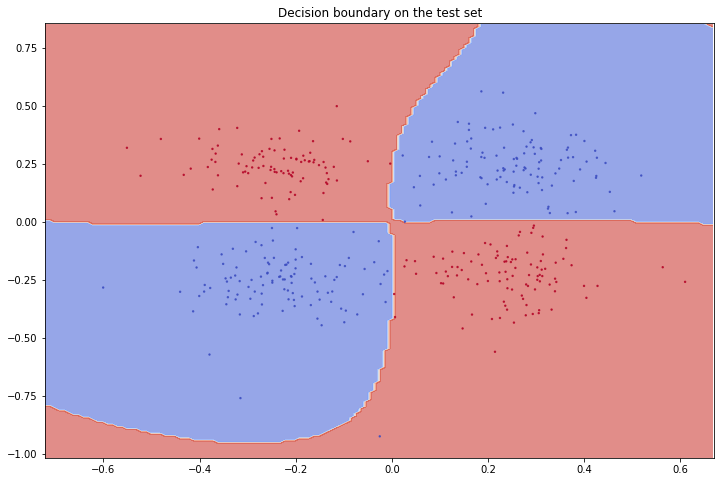

In [8]:
and_gate_pipeline.plot_prediction(
    figsize, h=0.01, 
    mesh_xlim=[x_min[0], x_max[0]], mesh_ylim=[x_min[1], x_max[1]], 
    xlim=[x_min[0], x_max[0]], ylim=[x_min[1], x_max[1]])


In [9]:
and_gate_pipeline.model.get_params()


{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 4096,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [10]:
# Parameter for stepping size of Adversarial Examples
epsilon = 0.006
max_epoch = 3000

and_gate_pipeline.generate_adversarial_examples(
    epsilon=epsilon, max_epoch=max_epoch)


Negative mean = [-0.0026, 0.0018]
Positive mean = [-0.0029, 0.0118]
Completed after 3001 epoch...
Misclassified = 148
Misclassified negative = 20 (5.0000%)
Misclassified positive = 128 (32.0000%)
Found 148 Adversarial Examples out of 400. 37.0000% successful rate


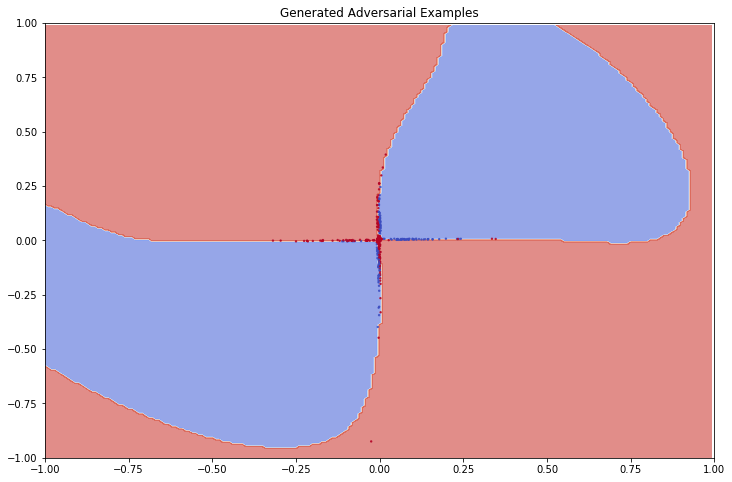

In [11]:
and_gate_pipeline.plot_adversarial_examples(
    figsize, h=0.01,
    mesh_xlim=[-1.0, 1.0], mesh_ylim=[-1.0, 1.0],
    xlim=[-1.0, 1.0], ylim=[-1.0, 1.0])


In [12]:
# Parameters for Applicability Domain
k = 9
zeta0 = 0.4
zeta1 = 0.4

and_gate_pipeline.run_applicability_domain(
    zeta0=zeta0, zeta1=zeta1, k=k)



---------- Applicability ---------------
Pass rate = 99.7500%

---------- Reliability -----------------

In 0 class:
Threshold = 0.0372
Average mean = 0.0922
Passed indices:


In 1 class:
Threshold = 0.0371
Average mean = 0.1009
Passed indices:
57, 107, 133
Distance of c0 in training set:
Mean               = 0.0287
Standard deviation = 0.0213
Threshold          = 0.0372

Distance of c1 in training set:
Mean               = 0.0281
Standard deviation = 0.0225
Threshold          = 0.0371

Pass rate = 0.7519%

---------- Decidability ----------------
Pass rate = 100.0000%

---------- Results ---------------------
Accuracy before AD = 63.0000%

Overall pass rate = 0.7500%
Accuracy after AD = 33.3333%
3 out of 400

Misclassified = 2
Misclassified negative = 0 (0.0000%)
Misclassified positive = 2 (66.6667%)
[ 0.0025,  0.0060] = 1; True y = 0
[-0.0816, -0.0035] = 1; True y = 0


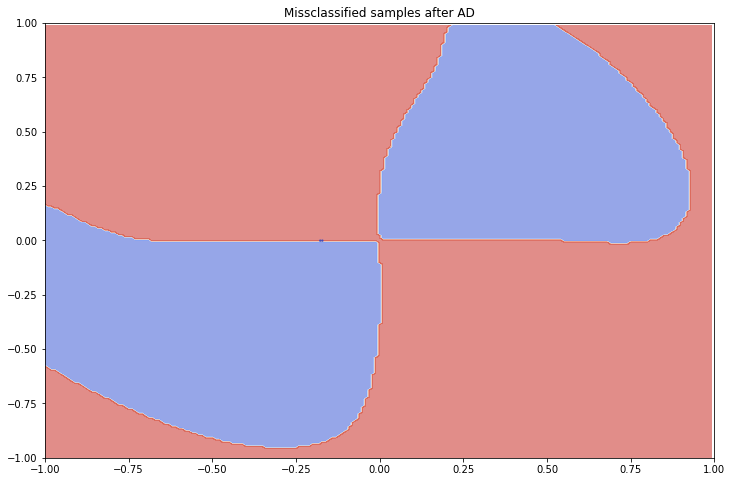

In [13]:
and_gate_pipeline.plot_after_ad(
    figsize, h=0.01,
    mesh_xlim=[-1.0, 1.0], mesh_ylim=[-1.0, 1.0],
    xlim=[-1.0, 1.0], ylim=[-1.0, 1.0])